In [191]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import matplotlib.pyplot as plt

In [192]:
#Loading all training Datasets
Benificiary = pd.read_csv("./Train_Beneficiarydata-1542865627584.csv")
Inpatient = pd.read_csv("./Train_Inpatientdata-1542865627584.csv")
Outpatient = pd.read_csv("./Train_Outpatientdata-1542865627584.csv")
Target = pd.read_csv("./Train-1542865627584.csv")


## Understanding the dataset

## Benificiary Table

In [193]:
#Understanding the Benificary Table
Benificiary.head(10)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,2,2,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,...,2,1,2,2,2,2,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,Y,44,230,12,12,...,2,1,2,2,2,2,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [194]:
Benificiary.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [195]:
Benificiary.shape

(138556, 25)

In [196]:
Benificiary.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [197]:
chronic_condition_columns = [col for col in Benificiary.columns if col.startswith('ChronicCond_')]

In [198]:
chronic_condition_columns

['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

### Data Pre-Processing in Benificiary Table

In [199]:
# Replacing 2 with 0 in the dataset for consistency
Benificiary[chronic_condition_columns] = Benificiary[chronic_condition_columns].replace({1:1, 2:0})
Benificiary.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200


In [200]:
#Cleaning data in the renal_disease column

Benificiary["RenalDiseaseIndicator"] = Benificiary["RenalDiseaseIndicator"].replace({'Y':1}).astype(int)

In [201]:
Benificiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50


In [202]:
#Cleaning data in the gender column

Benificiary["Gender"] = Benificiary["Gender"].replace({2:0}).astype(int)

In [203]:
# Renaming Columns
Benificiary.rename(columns={
    'BeneID': 'BeneID',
    'RenalDiseaseIndicator': 'Renal_Disease',
    'NoOfMonths_PartACov': 'Months_PartA_Coverage',
    'NoOfMonths_PartBCov': 'Months_PartB_Coverage',
    'ChronicCond_Alzheimer' : 'Alzheimer',
    'ChronicCond_Heartfailure':  'Heartfailure',
    'ChronicCond_KidneyDisease': 'KidneyDisease',
    'ChronicCond_Cancer' : 'Cancer'       ,             
    'ChronicCond_ObstrPulmonary' : 'ObstrPulmonary',
    'ChronicCond_Depression': 'Depression',
    'ChronicCond_Diabetes' : 'Diabetes',
    'ChronicCond_IschemicHeart': 'IschemicHeart',
    'ChronicCond_Osteoporasis': 'Osteoporasis',
    'ChronicCond_rheumatoidarthritis'	: 'arthritis',
    'ChronicCond_stroke': 'stroke',
    

}, inplace=True)


In [204]:
Benificiary.head(2)

,BeneID,DOB,DOD,Gender,Race,Renal_Disease,State,County,Months_PartA_Coverage,Months_PartB_Coverage,...,Depression,Diabetes,IschemicHeart,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50


In [205]:
# Changing data type of DOB and DOD to DateTime
Benificiary['DOB'] = pd.to_datetime(Benificiary['DOB'], errors='coerce')
Benificiary['DOD'] = pd.to_datetime(Benificiary['DOD'], errors='coerce')

In [206]:
Benificiary.dtypes

BeneID                              object
DOB                         datetime64[ns]
DOD                         datetime64[ns]
Gender                               int32
Race                                 int64
Renal_Disease                        int32
State                                int64
County                               int64
Months_PartA_Coverage                int64
Months_PartB_Coverage                int64
Alzheimer                            int64
Heartfailure                         int64
KidneyDisease                        int64
Cancer                               int64
ObstrPulmonary                       int64
Depression                           int64
Diabetes                             int64
IschemicHeart                        int64
Osteoporasis                         int64
arthritis                            int64
stroke                               int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualRei

In [207]:
# Creating Age column using DOB, DOD and Date when dataset was created.

In [208]:
#To calculate age, we are assuming that the last year of death will be the year, this data would have been generated
reference_date = pd.Timestamp('2009-12-31')
Benificiary['Age'] = ((reference_date - Benificiary['DOB']).dt.days // 365).fillna(0).astype(int)

In [209]:
Benificiary.head(5)

,BeneID,DOB,DOD,Gender,Race,Renal_Disease,State,County,Months_PartA_Coverage,Months_PartB_Coverage,...,Diabetes,IschemicHeart,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67
1,BENE11002,1936-09-01,NaT,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,73
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,73
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,87
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,74


In [210]:
Benificiary['is_dead'] = Benificiary['DOD'].notnull().astype(int)

In [211]:
Benificiary.head(20)

,BeneID,DOB,DOD,Gender,Race,Renal_Disease,State,County,Months_PartA_Coverage,Months_PartB_Coverage,...,IschemicHeart,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,0,1,1,36000,3204,60,70,67,0
1,BENE11002,1936-09-01,NaT,0,1,0,39,280,12,12,...,0,0,0,0,0,0,30,50,73,0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,1,0,0,0,0,0,90,40,73,0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,0,0,0,1810,760,87,0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,0,0,0,0,0,0,1790,1200,74,0
5,BENE11006,1976-09-01,NaT,0,1,0,23,810,12,12,...,0,0,0,0,0,0,500,0,33,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,1,0,0,0,1490,160,69,1
7,BENE11008,1934-02-01,NaT,0,1,0,15,140,12,12,...,0,0,0,0,0,0,30,0,75,0
8,BENE11009,1929-06-01,NaT,1,1,1,44,230,12,12,...,0,0,0,0,0,0,100,0,80,0
9,BENE11010,1936-07-01,NaT,0,1,0,41,30,12,12,...,1,1,0,0,0,0,1170,660,73,0


In [212]:
Benificiary.dtypes

BeneID                              object
DOB                         datetime64[ns]
DOD                         datetime64[ns]
Gender                               int32
Race                                 int64
Renal_Disease                        int32
State                                int64
County                               int64
Months_PartA_Coverage                int64
Months_PartB_Coverage                int64
Alzheimer                            int64
Heartfailure                         int64
KidneyDisease                        int64
Cancer                               int64
ObstrPulmonary                       int64
Depression                           int64
Diabetes                             int64
IschemicHeart                        int64
Osteoporasis                         int64
arthritis                            int64
stroke                               int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualRei

In [213]:
#Removing DOD and DOB as they are no longer needed.
Benificiary = Benificiary.drop(['DOB', 'DOD'], axis =1)

In [214]:
Benificiary.head()

,BeneID,Gender,Race,Renal_Disease,State,County,Months_PartA_Coverage,Months_PartB_Coverage,Alzheimer,Heartfailure,...,IschemicHeart,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead
0,BENE11001,1,1,0,39,230,12,12,1,0,...,1,0,1,1,36000,3204,60,70,67,0
1,BENE11002,0,1,0,39,280,12,12,0,0,...,0,0,0,0,0,0,30,50,73,0
2,BENE11003,1,1,0,52,590,12,12,1,0,...,1,0,0,0,0,0,90,40,73,0
3,BENE11004,1,1,0,39,270,12,12,1,1,...,1,1,1,0,0,0,1810,760,87,0
4,BENE11005,1,1,0,24,680,12,12,0,0,...,0,0,0,0,0,0,1790,1200,74,0


In [215]:
#CHECKING DUPLICATES
duplicate_rows = Benificiary.duplicated()
num_duplicates = duplicate_rows.sum()
num_duplicates

#No duplicate rows found in our dataset

0

# Inpaitent Data

In [216]:
#Understanding the inpaitent data
Inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [217]:
Inpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [218]:
Inpatient.isnull().sum()


BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [219]:
#Querying the data where all 3 Physician values are null
Inpatient.query('AttendingPhysician.isnull() and OperatingPhysician.isnull() and OtherPhysician.isnull()').shape

(106, 30)

In [220]:
#Dropping the rows where all 3 Physician values are null
Inpatient = Inpatient.drop(Inpatient.query('AttendingPhysician.isnull() and OperatingPhysician.isnull() and OtherPhysician.isnull()').index)

In [221]:
Inpatient.head(50)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [222]:
#Changing data type of all the date related columns
Inpatient['ClaimStartDt'] = pd.to_datetime(Inpatient['ClaimStartDt'], errors='coerce')
Inpatient['ClaimEndDt'] = pd.to_datetime(Inpatient['ClaimEndDt'], errors='coerce')
Inpatient['DischargeDt'] = pd.to_datetime(Inpatient['DischargeDt'], errors='coerce')
Inpatient['AdmissionDt'] = pd.to_datetime(Inpatient['AdmissionDt'], errors='coerce')

In [223]:
Inpatient.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
AdmissionDt               datetime64[ns]
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DischargeDt               datetime64[ns]
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode

In [224]:
#Creating a new column called Admit_duration using the formula
Inpatient['Admit_duration'] = ((Inpatient['DischargeDt'] - Inpatient['AdmissionDt']).dt.days).astype(int)

In [225]:
Inpatient.tail(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_duration
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
40473,BENE159188,CLM69948,2009-09-28,2009-10-06,PRV54765,15000,PHY431177,PHY352941,NaN,2009-09-28,...,2800,27801,NaN,1733.0,NaN,NaN,NaN,NaN,NaN,8


In [226]:
#Dropping AdmissionDt and DischargeDt as they are no longer needed.
Inpatient.drop(['AdmissionDt', 'DischargeDt'], axis = 1, inplace = True)

In [227]:
Inpatient.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode_1               float64
ClmProcedureCode_2               float64
ClmProcedureCode

In [228]:
duplicates = Inpatient.duplicated(subset=['ClaimID']).sum()
duplicates

0

# Outpatients Data

In [229]:
Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [230]:
Outpatient.isnull().sum()


BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [231]:
Outpatient.shape

(517737, 27)

In [232]:
#Querying the rows where all 3 Physician values are null
Outpatient.query('AttendingPhysician.isnull() and OperatingPhysician.isnull() and OtherPhysician.isnull()').shape

(1377, 27)

In [233]:
#Dropping the rows where all 3 Physician values are null
Outpatient = Outpatient.drop(Outpatient.query('AttendingPhysician.isnull() and OperatingPhysician.isnull() and OtherPhysician.isnull()').index)

In [234]:
Outpatient.shape

(516360, 27)

In [235]:
#Changing data type of all the date related columns
Outpatient['ClaimStartDt'] = pd.to_datetime(Outpatient['ClaimStartDt'], errors='coerce')
Outpatient['ClaimEndDt'] = pd.to_datetime(Outpatient['ClaimEndDt'], errors='coerce')

In [236]:
Inpatient.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode_1               float64
ClmProcedureCode_2               float64
ClmProcedureCode

In [237]:
duplicates = Outpatient.duplicated(subset=['ClaimID']).sum()
duplicates

0

### Joining the Inpatient and Outpatient Data

In [238]:
#Combining both the Inpatient and Outpatient datasets using concat method

#### We are using the concat method over here rather than outer join is because we intend to create a new feature called claim_type and after that Concat seemed to be a better option.

In [239]:
#Combining Inpatient and Outpatient data
Inpatient['ClaimType'] = 'Inpatient'
Outpatient['ClaimType'] = 'Outpatient'

# Concatenate the datasets
all_patient = pd.concat([Inpatient, Outpatient], ignore_index=True)



In [240]:
all_patient.tail()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_duration,ClaimType
556723,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient
556724,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient
556725,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient
556726,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient
556727,BENE159198,CLM686139,2009-11-17,2009-11-18,PRV53689,80,PHY419379,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outpatient


In [241]:
#For outpatient data (Patients visting the hospital just for a visit) we have filled null values with 0

In [242]:
all_patient['Admit_duration'] = all_patient['Admit_duration'].fillna(0)

In [243]:
all_patient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_duration,ClaimType
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Inpatient
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,6186,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2.0,Inpatient
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Inpatient
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8.0,Inpatient
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,78321,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17.0,Inpatient


In [244]:
all_patient.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode_1               float64
ClmProcedureCode_2               float64
ClmProcedureCode

In [245]:
#Dropping ClaimEndDt	 
all_patient.drop('ClaimEndDt' , axis = 1, inplace=True)

In [246]:
all_patient.head()

,BeneID,ClaimID,ClaimStartDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_duration,ClaimType
0,BENE11001,CLM46614,2009-04-12,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Inpatient
1,BENE11001,CLM66048,2009-08-31,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2.0,Inpatient
2,BENE11001,CLM68358,2009-09-17,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Inpatient
3,BENE11011,CLM38412,2009-02-14,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8.0,Inpatient
4,BENE11014,CLM63689,2009-08-13,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17.0,Inpatient


# Joining the Benificiary table

In [247]:
#We are adding the Benificiary table to the newly created combined dataset all_patient

In [248]:
all_patient_with_bene  = all_patient.merge(Benificiary, on='BeneID', how='left')

In [249]:
all_patient_with_bene.tail()

,BeneID,ClaimID,ClaimStartDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,...,IschemicHeart,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead
556723,BENE159198,CLM510792,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,0.0,...,0,0,1,0,0,0,5470,1870,57,0
556724,BENE159198,CLM551294,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,0.0,...,0,0,1,0,0,0,5470,1870,57,0
556725,BENE159198,CLM596444,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,0.0,...,0,0,1,0,0,0,5470,1870,57,0
556726,BENE159198,CLM636992,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,0.0,...,0,0,1,0,0,0,5470,1870,57,0
556727,BENE159198,CLM686139,2009-11-17,PRV53689,80,PHY419379,NaN,PHY419379,NaN,0.0,...,0,0,1,0,0,0,5470,1870,57,0


In [250]:
all_patient_with_bene.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                datetime64[ns]
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosisCode_10                 object
ClmProcedureCode_1                 float64
ClmProcedureCode_2                 float64
ClmProcedur

## The Target Table

In [251]:
Target.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


# Joining the Target Data Table to determine Fraud

In [252]:
#Joining the target data as well and naming that Final_all_patient

In [253]:
Final_all_patient  = all_patient_with_bene.merge(Target, on='Provider', how='left')

In [254]:
Final_all_patient.head()

,BeneID,ClaimID,ClaimStartDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,...,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,...,0,1,1,36000,3204,60,70,67,0,Yes
1,BENE11001,CLM66048,2009-08-31,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,...,0,1,1,36000,3204,60,70,67,0,No
2,BENE11001,CLM68358,2009-09-17,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,...,0,1,1,36000,3204,60,70,67,0,No
3,BENE11011,CLM38412,2009-02-14,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,...,0,1,1,5000,1068,250,320,95,0,No
4,BENE11014,CLM63689,2009-08-13,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,...,0,0,0,21260,2136,120,100,71,0,No


In [255]:
#The PotentialFraud column has values Yes and No, we are converting it to 1 and 0 

In [256]:
Final_all_patient['PotentialFraud'] = Final_all_patient['PotentialFraud'].replace({'Yes':1, 'No':0})

C:\Users\Anand\AppData\Local\Temp\ipykernel_11092\3428070298.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Final_all_patient['PotentialFraud'] = Final_all_patient['PotentialFraud'].replace({'Yes':1, 'No':0})


In [257]:
Final_all_patient.head(2)

,BeneID,ClaimID,ClaimStartDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,...,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,...,0,1,1,36000,3204,60,70,67,0,1
1,BENE11001,CLM66048,2009-08-31,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,...,0,1,1,36000,3204,60,70,67,0,0


In [258]:
Final_all_patient.shape


(556728, 54)

In [259]:
## Checking the distribution of Fraud

In [260]:
Final_all_patient['PotentialFraud'].value_counts(normalize = True)

PotentialFraud
0    0.618765
1    0.381235
Name: proportion, dtype: float64

In [261]:
Final_all_patient.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                datetime64[ns]
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosisCode_10                 object
ClmProcedureCode_1                 float64
ClmProcedureCode_2                 float64
ClmProcedur

In [262]:
#Changing the datatype of all categorical columns to category. Did not change to obj, as there were multiple issues during EDA.
Categorical_columns = [
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
    'Gender', 'Race', 'Renal_Disease', 'State', 'County',
    'Months_PartA_Coverage', 'Months_PartB_Coverage', 'Alzheimer',
    'Heartfailure', 'KidneyDisease', 'Cancer', 'ObstrPulmonary',
    'Depression', 'Diabetes', 'IschemicHeart', 'Osteoporasis',
    'arthritis', 'stroke', 'is_dead', 'PotentialFraud'
]


Final_all_patient[Categorical_columns] = Final_all_patient[Categorical_columns].astype('category')


In [263]:
Final_all_patient.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                datetime64[ns]
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosisCode_10                 object
ClmProcedureCode_1                category
ClmProcedureCode_2                category
ClmProcedur

# EDA

## Plotting Categorical Variables

In [264]:
#Defining all the categorical variables
categorical_columns = ['ClaimType', 'Gender', 'Race', 'PotentialFraud']

C:\Users\Anand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Anand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Anand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Anand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed

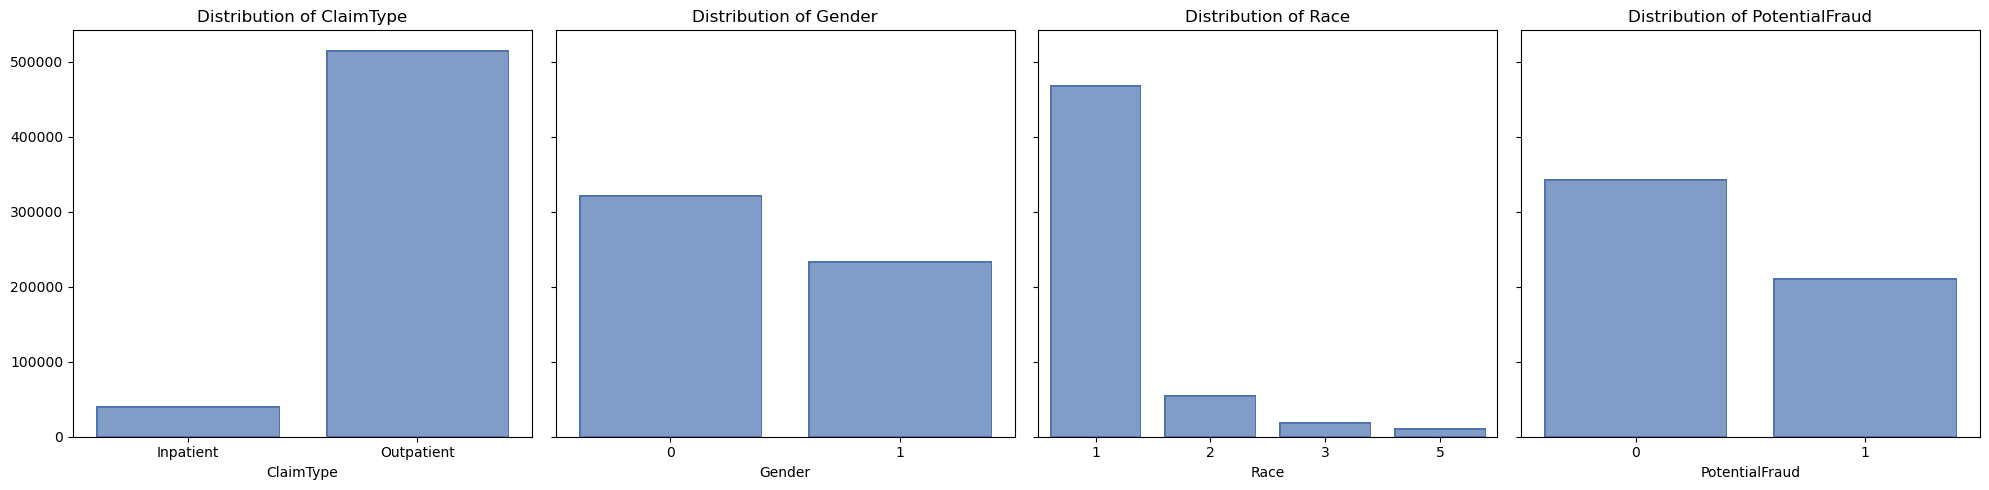

In [265]:
# Creating subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 5), sharey=True)


for ax, col in zip(axes, categorical_columns):
    plot = (
        so.Plot(data=Final_all_patient, x=col)
        .add(so.Bar(), so.Count())
        .label(title=f"Distribution of {col}", xlabel=col, ylabel="Count")
    )
    plot.on(ax).plot()


plt.tight_layout()
plt.show()


In [266]:
# Plotting Diganosis columns

In [267]:
diagnosis_columns = [
    'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
    'ClmDiagnosisCode_10'
]

In [268]:
values_in_diagnosis_columns = Final_all_patient[diagnosis_columns].notnull().sum()
values_in_diagnosis_columns

ClmDiagnosisCode_1     546312
ClmDiagnosisCode_2     361694
ClmDiagnosisCode_3     242457
ClmDiagnosisCode_4     164128
ClmDiagnosisCode_5     111662
ClmDiagnosisCode_6      84201
ClmDiagnosisCode_7      66028
ClmDiagnosisCode_8      53323
ClmDiagnosisCode_9      41735
ClmDiagnosisCode_10      5009
dtype: int64

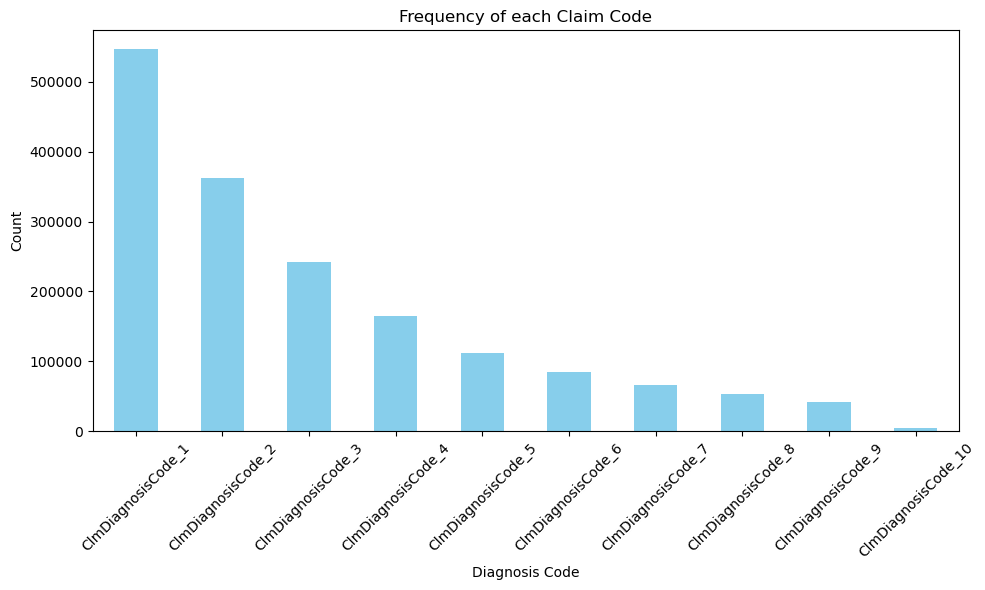

In [269]:
plt.figure(figsize=(10, 6))
values_in_diagnosis_columns.plot(kind='bar', color='skyblue')
plt.title("Frequency of each Claim Code")
plt.xlabel("Diagnosis Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [270]:
# Plotting Procedure columns

In [271]:
Procedure_columns = [
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
    
    
]

In [272]:
values_in_Procedure_columns = Final_all_patient[Procedure_columns].notnull().sum()
values_in_Procedure_columns

ClmProcedureCode_1    23262
ClmProcedureCode_2     5480
ClmProcedureCode_3      968
ClmProcedureCode_4      118
ClmProcedureCode_5        9
ClmProcedureCode_6        0
dtype: int64

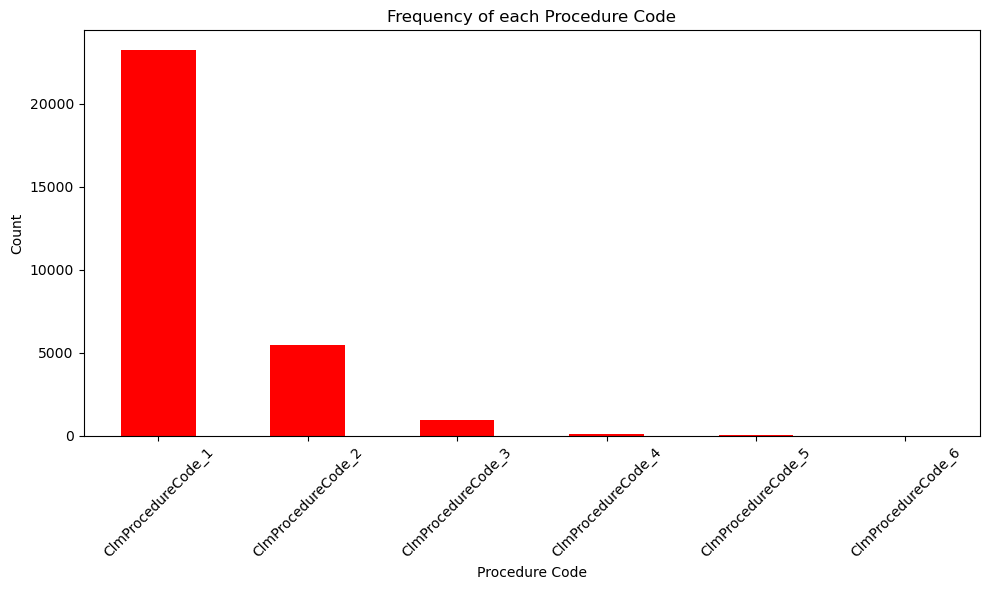

In [273]:
plt.figure(figsize=(10, 6))
values_in_Procedure_columns.plot(kind='bar', color='red')
plt.title("Frequency of each Procedure Code")
plt.xlabel("Procedure Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Anand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


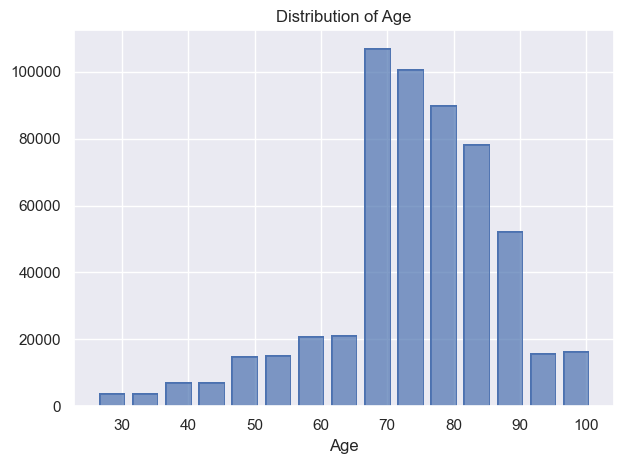

In [274]:
#Plotting Distribution of age
plot = (
    so.Plot(data=Final_all_patient, x="Age")
    .add(so.Bar(), so.Hist(binwidth=5))  
    .label(title="Distribution of Age", xlabel="Age", ylabel="Frequency")
)

plot.show()

# Bivariate Analysis

In [275]:
import seaborn as sns

In [276]:
#Count of Fraud in each state
fraud_data = Final_all_patient[Final_all_patient['PotentialFraud'] == 1]

In [277]:
#State VS Fraud

In [278]:
state_fraud_counts = fraud_data['State'].value_counts().reset_index()
state_fraud_counts.columns = ['State', 'Count']

C:\Users\Anand\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


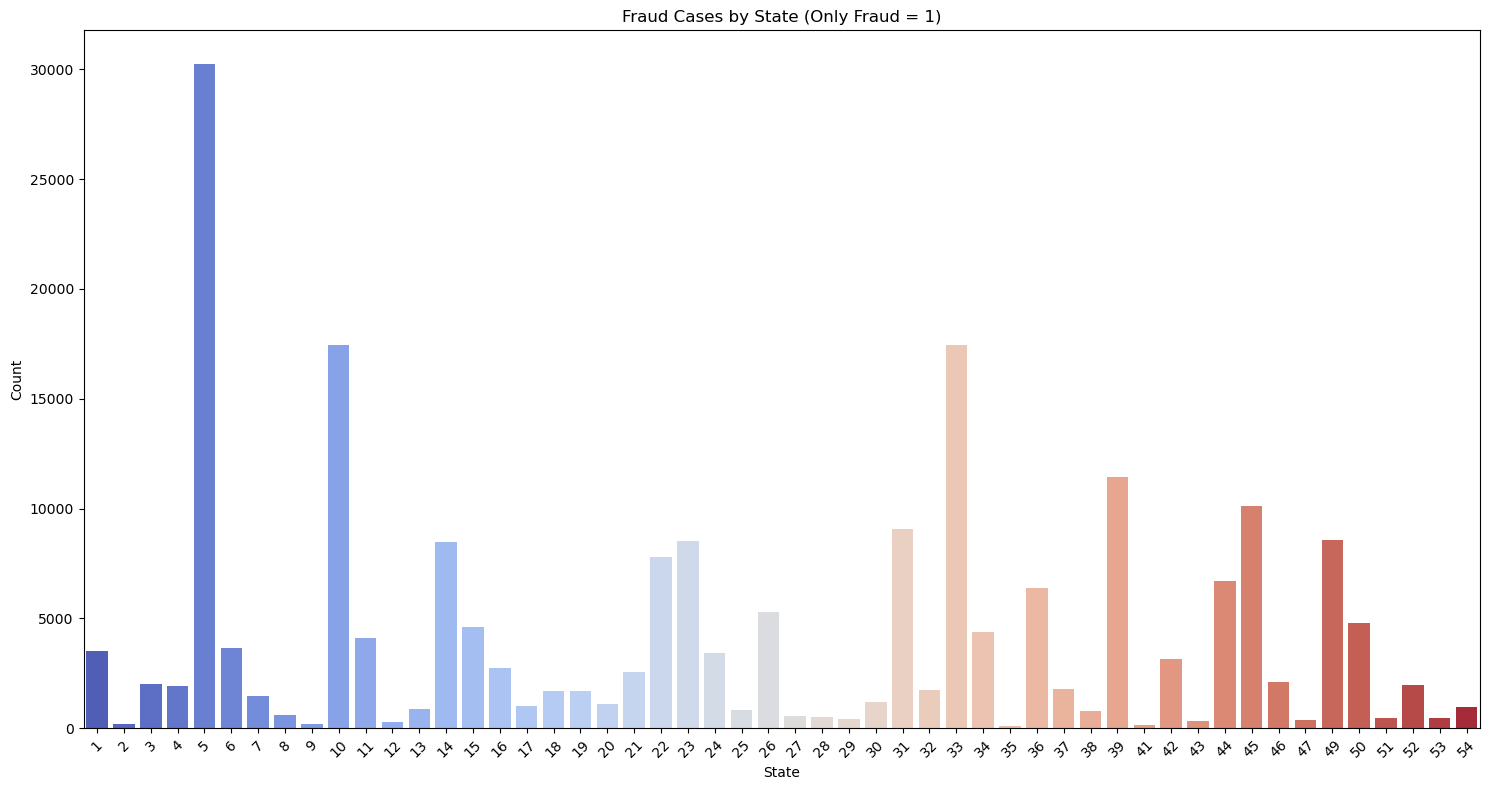

In [279]:
plt.figure(figsize=(15, 8))
sns.barplot(data=state_fraud_counts, x="State", y="Count", palette="coolwarm")
plt.title("Fraud Cases by State (Only Fraud = 1)")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


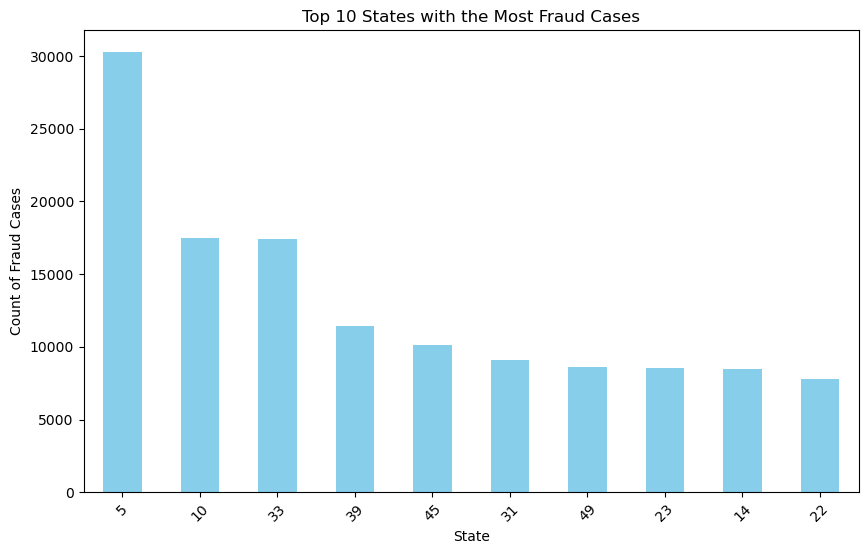

In [280]:
#Checking the top 10 states with most fraud in the USA

state_fraud_counts = fraud_data['State'].value_counts()

top_10_states = state_fraud_counts.head(10)

    
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')
plt.title("Top 10 States with the Most Fraud Cases")
plt.xlabel("State")
plt.ylabel("Count of Fraud Cases")
plt.xticks(rotation=45)
plt.show()


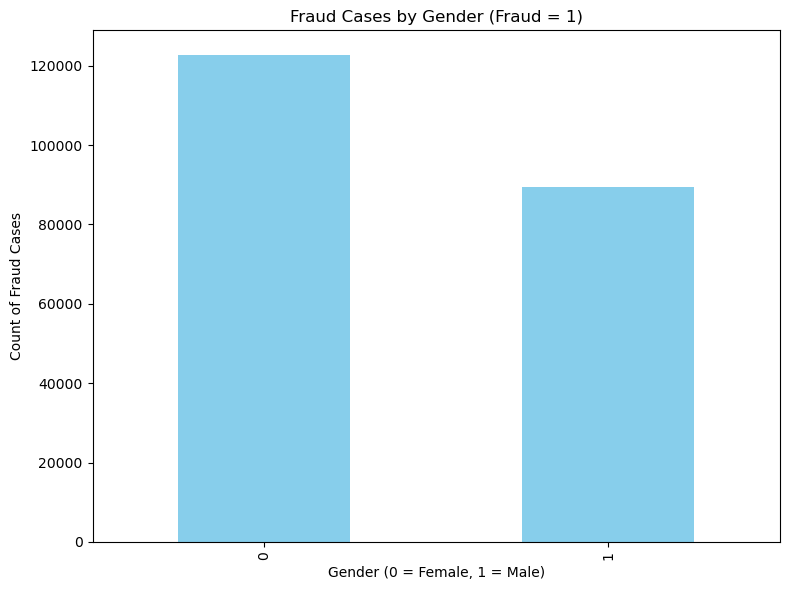

In [281]:
#Distribution of Fraud according to Gender


gender_fraud_counts = fraud_data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_fraud_counts.plot(kind='bar', color='skyblue')
plt.title("Fraud Cases by Gender (Fraud = 1)")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count of Fraud Cases")
plt.tight_layout()
plt.show()


Percentage of fraud cases for each ClaimType:
    ClaimType  Fraud_Percentage
0   Inpatient         57.840369
1  Outpatient         36.582036


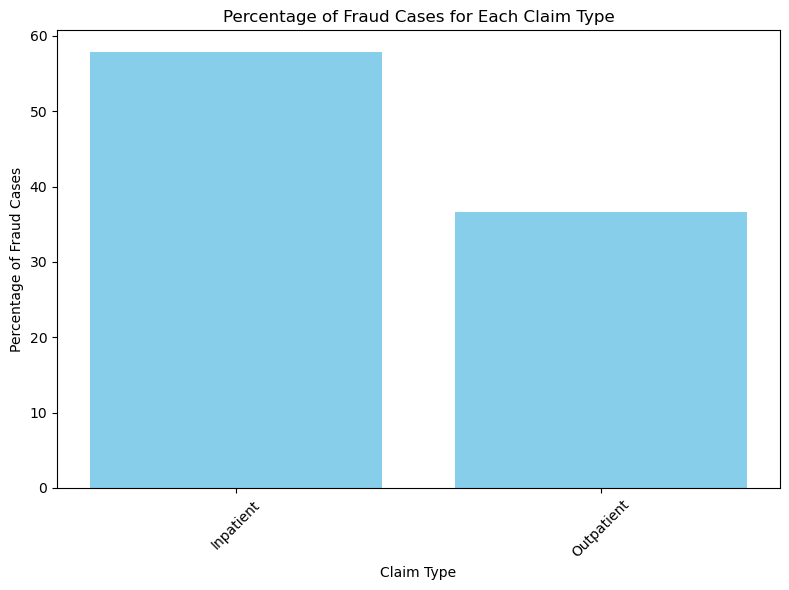

In [282]:
# Fraud cases for each ClaimType
claim_fraud_percent = (
    Final_all_patient[Final_all_patient['PotentialFraud'] == 1]
    .groupby('ClaimType')
    .size() / Final_all_patient.groupby('ClaimType').size() * 100
).reset_index(name='Fraud_Percentage')


print("Percentage of fraud cases for each ClaimType:")
print(claim_fraud_percent)



plt.figure(figsize=(8, 6))
plt.bar(claim_fraud_percent['ClaimType'], claim_fraud_percent['Fraud_Percentage'], color='skyblue')
plt.title("Percentage of Fraud Cases for Each Claim Type")
plt.xlabel("Claim Type")
plt.ylabel("Percentage of Fraud Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Procedure codes with 100 percent fraud with minimum 5 occurences.

In [283]:
procedure_columns = [
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
]

In [284]:
# Combining all procedure codes into one column with fraud status
procedure_data_melted = Final_all_patient.melt(
    id_vars=['PotentialFraud'],
    value_vars=procedure_columns,
    var_name='ProcedureCodeColumn',
    value_name='ProcedureCode'
)
procedure_data_melted.head()

,PotentialFraud,ProcedureCodeColumn,ProcedureCode
0,1,ClmProcedureCode_1,NaN
1,0,ClmProcedureCode_1,7092.0
2,0,ClmProcedureCode_1,NaN
3,0,ClmProcedureCode_1,331.0
4,0,ClmProcedureCode_1,3893.0


In [285]:
# Here we are filtering cases where PotentialFraud = 1
fraud_data_melted = procedure_data_melted[procedure_data_melted['PotentialFraud'] == 1]

# Calculating the percentage of fraud for each procedure code
procedure_fraud_percentage = (
    fraud_data_melted['ProcedureCode'].value_counts() /
    procedure_data_melted['ProcedureCode'].value_counts() * 100
).dropna()

procedure_fraud_percentage.head

<bound method NDFrame.head of ProcedureCode
11.0      100.000000
13.0       50.000000
14.0       66.666667
17.0       33.333333
22.0       50.000000
             ...    
9984.0     66.666667
9986.0     33.333333
9992.0     66.666667
9998.0    100.000000
9999.0     80.000000
Name: count, Length: 1122, dtype: float64>

In [286]:
fraud_counts = fraud_data_melted['ProcedureCode'].value_counts()
total_counts = procedure_data_melted['ProcedureCode'].value_counts()


procedure_fraud_stats = pd.DataFrame({
    'Fraud_Percentage': procedure_fraud_percentage,
    'Total_Count': total_counts
}).dropna()



In [287]:
# Filter the codes where the total fraud percentage = 100 and count >= 5
filtered_procedure_fraud_stats = procedure_fraud_stats[
    (procedure_fraud_stats['Fraud_Percentage'] == 100) & 
    (procedure_fraud_stats['Total_Count'] >= 5)
]

print("Procedure codes with 100% fraud and at least 5 occurrences:")
print(filtered_procedure_fraud_stats)

Procedure codes with 100% fraud and at least 5 occurrences:
               Fraud_Percentage  Total_Count
ProcedureCode                               
3241.0                    100.0           13
3797.0                    100.0            8
3845.0                    100.0            5
5371.0                    100.0            6
5504.0                    100.0            5
7051.0                    100.0            7
7765.0                    100.0            5
7912.0                    100.0            5
8105.0                    100.0            7
8845.0                    100.0            5


In [288]:
# Extracing procedure codes and their corresponding counts from the filtered DataFrame
procedure_codes = filtered_procedure_fraud_stats.index.astype(str)  
fraud_counts = filtered_procedure_fraud_stats['Total_Count'].values  


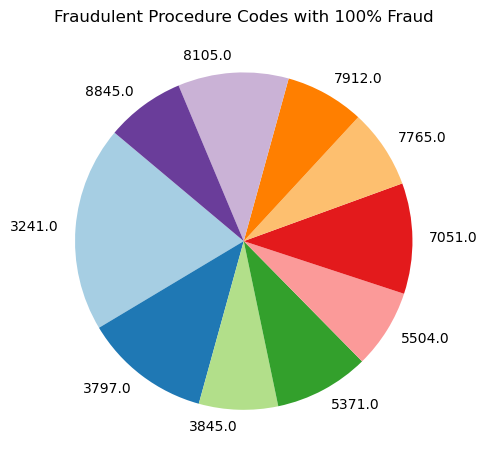

In [289]:
# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    fraud_counts,
    labels=procedure_codes,
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Fraudulent Procedure Codes with 100% Fraud")
plt.tight_layout()
plt.show()


### Diagnosis codes with 100 percent fraud with minimum 5 occurences.

In [290]:
# Combining all the  diagnosis codes into one column with their fraud status
diagnosis_data = Final_all_patient.melt(
    id_vars=['PotentialFraud'],
    value_vars=diagnosis_columns,
    var_name='DiagnosisCodeColumn',
    value_name='DiagnosisCode')

diagnosis_data.head()

,PotentialFraud,DiagnosisCodeColumn,DiagnosisCode
0,1,ClmDiagnosisCode_1,1970
1,0,ClmDiagnosisCode_1,6186
2,0,ClmDiagnosisCode_1,29623
3,0,ClmDiagnosisCode_1,43491
4,0,ClmDiagnosisCode_1,042


In [291]:
fraud_diagnosis_data = diagnosis_data[diagnosis_data['PotentialFraud'] == 1]
fraud_diagnosis_data.head()

,PotentialFraud,DiagnosisCodeColumn,DiagnosisCode
0,1,ClmDiagnosisCode_1,1970
5,1,ClmDiagnosisCode_1,1745
7,1,ClmDiagnosisCode_1,56212
9,1,ClmDiagnosisCode_1,41041
10,1,ClmDiagnosisCode_1,03842


In [292]:
# Calculating the percentage of fraud for each diagnosis code
diagnosis_fraud_percentage = (
    fraud_diagnosis_data['DiagnosisCode'].value_counts() /
    diagnosis_data['DiagnosisCode'].value_counts() * 100
).dropna().sort_values(ascending=False)

diagnosis_fraud_percentage


DiagnosisCode
74402    100.000000
80364    100.000000
E9554    100.000000
64793    100.000000
37820    100.000000
            ...    
39899      7.692308
71281      7.692308
71218      7.692308
3919       7.692308
9541       7.142857
Name: count, Length: 9763, dtype: float64

In [293]:
fraud_counts = fraud_diagnosis_data['DiagnosisCode'].value_counts()
total_counts = diagnosis_data['DiagnosisCode'].value_counts()

diagnosis_fraud_stats = pd.DataFrame({
    'Fraud_Percentage': diagnosis_fraud_percentage,
    'Total_Count': total_counts
}).dropna()

diagnosis_fraud_stats.head()

,Fraud_Percentage,Total_Count
DiagnosisCode,,
0010,28.571429,7
0011,100.000000,1
0019,33.333333,3
0020,25.000000,4
0021,80.000000,5


In [294]:

# Filtering the data for fraud percentage = 100 and count >= 5
filtered_diagnosis_fraud_stats = diagnosis_fraud_stats[
    (diagnosis_fraud_stats['Fraud_Percentage'] == 100) & 
    (diagnosis_fraud_stats['Total_Count'] >= 5)
]


print("Diagnosis codes with 100% fraud and at least 5 occurrences:")
print(filtered_diagnosis_fraud_stats.head(20))


Diagnosis codes with 100% fraud and at least 5 occurrences:
               Fraud_Percentage  Total_Count
DiagnosisCode                               
30282                     100.0            5
37887                     100.0            5
52662                     100.0            5
64821                     100.0            5
64891                     100.0            7
65971                     100.0            5


In [295]:
# Extracting procedure codes and their corresponding counts from the filtered DataFrame
procedure_codes = filtered_diagnosis_fraud_stats.index.astype(str)  
fraud_counts = filtered_diagnosis_fraud_stats['Total_Count'].values  


In [296]:
# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    fraud_counts,
    labels=diagnosis_codes,
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Fraudulent Diagnosis Codes with 100% Fraud")
plt.tight_layout()
plt.show()


NameError: name 'diagnosis_codes' is not defined

<Figure size 500x500 with 0 Axes>

In [ ]:
#Frauds with different health issues
health_conditions = [
    'Alzheimer', 'Heartfailure', 'KidneyDisease', 'Cancer',
    'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
    'Osteoporasis', 'arthritis', 'stroke'
]


for col in health_conditions:
    Final_all_patient[col] = Final_all_patient[col].astype(int)

fraud_counts = Final_all_patient[Final_all_patient['PotentialFraud'] == 1][health_conditions].sum()


plt.figure(figsize=(12, 6))
fraud_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Fraud Count by Health Condition")
plt.xlabel("Health Condition")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


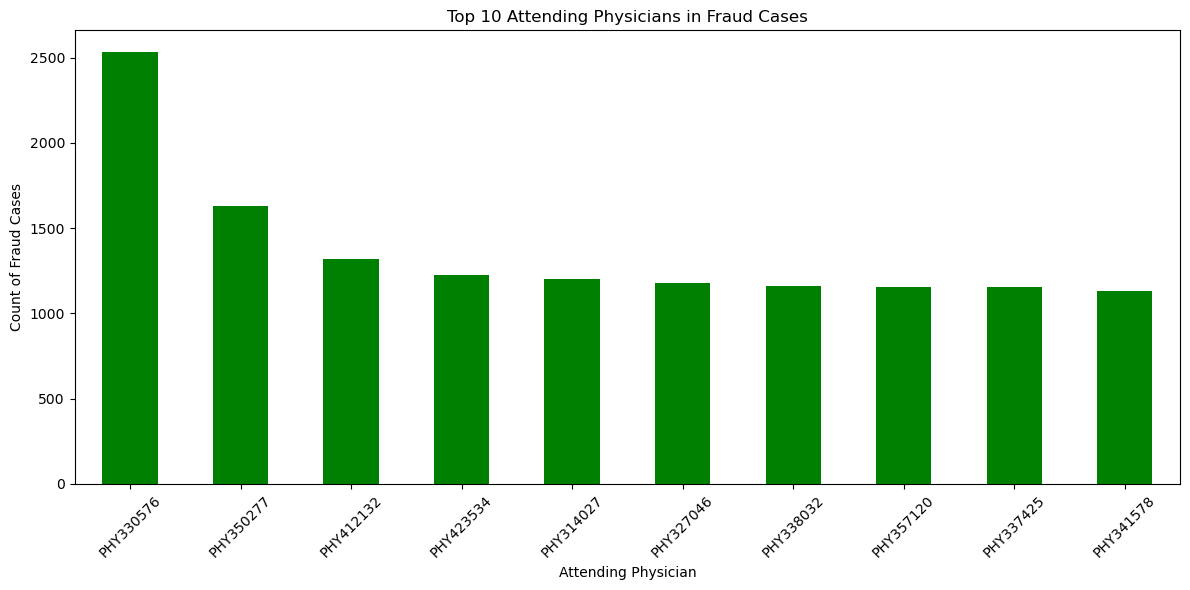

In [297]:
#Physicians vs Fraud

fraud_data = Final_all_patient[Final_all_patient['PotentialFraud'] == 1]


attending_physician_counts = fraud_data['AttendingPhysician'].value_counts().head(10)


plt.figure(figsize=(12, 6))
attending_physician_counts.plot(kind='bar', color='green')
plt.title("Top 10 Attending Physicians in Fraud Cases")
plt.xlabel("Attending Physician")
plt.ylabel("Count of Fraud Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Checking how much the top 10 physicians contribute to the total_fraud_cases

In [298]:
#Total number of fraud cases
total_fraud_cases = fraud_data['AttendingPhysician'].notnull().sum() 


In [299]:
# Sum the fraud cases for the top 10 physicians
top_10_fraud_cases = attending_physician_counts.sum()
top_10_fraud_cases

13690

In [300]:
# Calculating the percentage contribution
top_10_contribution_percentage = (top_10_fraud_cases / total_fraud_cases) * 100

print(f"Top 10 physicians contribute to {top_10_contribution_percentage:.2f}% of all fraud cases.")


Top 10 physicians contribute to 6.45% of all fraud cases.


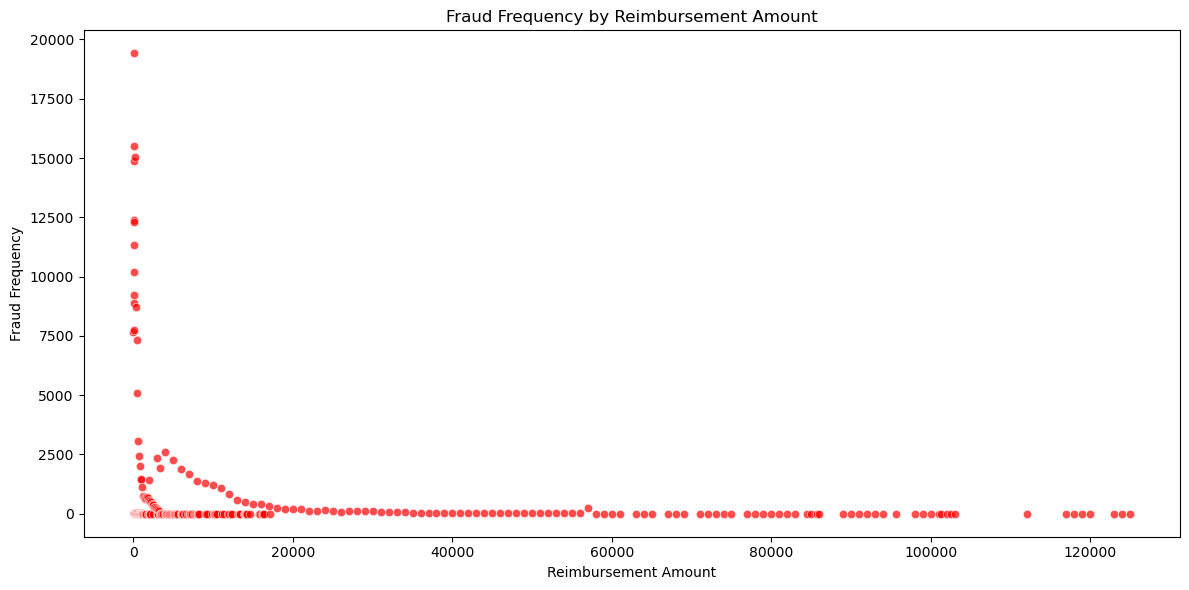

In [301]:
fraud_grouped_by_claim = fraud_data.groupby('InscClaimAmtReimbursed').size().reset_index(name='FraudCount')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=fraud_grouped_by_claim, x='InscClaimAmtReimbursed', y='FraudCount', alpha=0.7, color='red')
plt.title("Fraud Frequency by Reimbursement Amount")
plt.xlabel("Reimbursement Amount")
plt.ylabel("Fraud Frequency")
plt.tight_layout()
plt.show()


# Feature Engineering

In [302]:
# Dropping claim start date
Final_all_patient.drop("ClaimStartDt", axis = 1, inplace = True)

In [303]:
#Changing the datatype of all categorical columns to category. for Modeling.
Categorical_columns = [
    'BeneID', 'ClaimID', 'Provider', 'AttendingPhysician', 'OperatingPhysician',
    'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
    'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
    'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
    'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 
    'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 
    'ClmProcedureCode_6', 'Gender', 'Race', 'Renal_Disease', 'State', 
    'County', 'Months_PartA_Coverage', 'Months_PartB_Coverage', 'Alzheimer', 
    'Heartfailure', 'KidneyDisease', 'Cancer', 'ObstrPulmonary', 
    'Depression', 'Diabetes', 'IschemicHeart', 'Osteoporasis', 'arthritis', 
    'stroke', 'is_dead', 'PotentialFraud', 'ClaimType'
]


Final_all_patient[Categorical_columns] = Final_all_patient[Categorical_columns].astype('category')


In [304]:
Final_all_patient.dtypes

BeneID                      category
ClaimID                     category
Provider                    category
InscClaimAmtReimbursed         int64
AttendingPhysician          category
OperatingPhysician          category
OtherPhysician              category
ClmAdmitDiagnosisCode       category
DeductibleAmtPaid            float64
DiagnosisGroupCode          category
ClmDiagnosisCode_1          category
ClmDiagnosisCode_2          category
ClmDiagnosisCode_3          category
ClmDiagnosisCode_4          category
ClmDiagnosisCode_5          category
ClmDiagnosisCode_6          category
ClmDiagnosisCode_7          category
ClmDiagnosisCode_8          category
ClmDiagnosisCode_9          category
ClmDiagnosisCode_10         category
ClmProcedureCode_1          category
ClmProcedureCode_2          category
ClmProcedureCode_3          category
ClmProcedureCode_4          category
ClmProcedureCode_5          category
ClmProcedureCode_6          category
Admit_duration               float64
C

# Removing the features where missing values are more than 60 percent

In [305]:
missing_percentage = Final_all_patient.isnull().mean() * 100

In [306]:
missing_percentage

BeneID                        0.000000
ClaimID                       0.000000
Provider                      0.000000
InscClaimAmtReimbursed        0.000000
AttendingPhysician            0.004491
OperatingPhysician           79.442924
OtherPhysician               64.123234
ClmAdmitDiagnosisCode        73.937183
DeductibleAmtPaid             0.160401
DiagnosisGroupCode           92.749062
ClmDiagnosisCode_1            1.870932
ClmDiagnosisCode_2           35.032188
ClmDiagnosisCode_3           56.449649
ClmDiagnosisCode_4           70.519176
ClmDiagnosisCode_5           79.943168
ClmDiagnosisCode_6           84.875738
ClmDiagnosisCode_7           88.139989
ClmDiagnosisCode_8           90.422073
ClmDiagnosisCode_9           92.503521
ClmDiagnosisCode_10          99.100279
ClmProcedureCode_1           95.821658
ClmProcedureCode_2           99.015677
ClmProcedureCode_3           99.826127
ClmProcedureCode_4           99.978805
ClmProcedureCode_5           99.998383
ClmProcedureCode_6       

In [307]:
dropped_columns = missing_percentage[missing_percentage > 60].index


Final_all_patient = Final_all_patient.drop(columns=dropped_columns)


In [308]:
dropped_columns

Index(['OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6'],
      dtype='object')

In [309]:
#Checking missing percent
missing_percentage = Final_all_patient.isnull().mean() * 100
missing_percentage

BeneID                       0.000000
ClaimID                      0.000000
Provider                     0.000000
InscClaimAmtReimbursed       0.000000
AttendingPhysician           0.004491
DeductibleAmtPaid            0.160401
ClmDiagnosisCode_1           1.870932
ClmDiagnosisCode_2          35.032188
ClmDiagnosisCode_3          56.449649
Admit_duration               0.000000
ClaimType                    0.000000
Gender                       0.000000
Race                         0.000000
Renal_Disease                0.000000
State                        0.000000
County                       0.000000
Months_PartA_Coverage        0.000000
Months_PartB_Coverage        0.000000
Alzheimer                    0.000000
Heartfailure                 0.000000
KidneyDisease                0.000000
Cancer                       0.000000
ObstrPulmonary               0.000000
Depression                   0.000000
Diabetes                     0.000000
IschemicHeart                0.000000
Osteoporasis

### Dropping ClmDiagnosisCode_2 and ClmDiagnosisCode_3 based on Domain Knowledge. They are secondary diagnosis and have a high perentange of missing values.

In [310]:
Final_all_patient.drop(columns=['ClmDiagnosisCode_2'], inplace=True)


In [311]:
Final_all_patient.drop(columns=['ClmDiagnosisCode_3'], inplace=True)


In [312]:
missing_percentage = Final_all_patient.isnull().mean() * 100
missing_percentage


BeneID                      0.000000
ClaimID                     0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.004491
DeductibleAmtPaid           0.160401
ClmDiagnosisCode_1          1.870932
Admit_duration              0.000000
ClaimType                   0.000000
Gender                      0.000000
Race                        0.000000
Renal_Disease               0.000000
State                       0.000000
County                      0.000000
Months_PartA_Coverage       0.000000
Months_PartB_Coverage       0.000000
Alzheimer                   0.000000
Heartfailure                0.000000
KidneyDisease               0.000000
Cancer                      0.000000
ObstrPulmonary              0.000000
Depression                  0.000000
Diabetes                    0.000000
IschemicHeart               0.000000
Osteoporasis                0.000000
arthritis                   0.000000
stroke                      0.000000
I

## Dropping rows in AttendingPhysician and ClmDiagnosisCode_1 where there are null values

In [313]:
Final_all_patient.dropna(subset=['AttendingPhysician', 'ClmDiagnosisCode_1'], inplace=True)


In [314]:
missing_percentage = Final_all_patient.isnull().mean() * 100
missing_percentage


BeneID                      0.000000
ClaimID                     0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.000000
DeductibleAmtPaid           0.162918
ClmDiagnosisCode_1          0.000000
Admit_duration              0.000000
ClaimType                   0.000000
Gender                      0.000000
Race                        0.000000
Renal_Disease               0.000000
State                       0.000000
County                      0.000000
Months_PartA_Coverage       0.000000
Months_PartB_Coverage       0.000000
Alzheimer                   0.000000
Heartfailure                0.000000
KidneyDisease               0.000000
Cancer                      0.000000
ObstrPulmonary              0.000000
Depression                  0.000000
Diabetes                    0.000000
IschemicHeart               0.000000
Osteoporasis                0.000000
arthritis                   0.000000
stroke                      0.000000
I

# Filling out DeductibleAmtPaid with Median

In [315]:
#checking median data for inpatient. (For outpatient Deductible amout is 0)
median_inpatient = Final_all_patient.loc[Final_all_patient['ClaimType'] == 'Inpatient', 'DeductibleAmtPaid'].median()
median_inpatient

1068.0

In [316]:
Final_all_patient.loc[Final_all_patient['ClaimType'] == 'Inpatient', 'DeductibleAmtPaid'] = Final_all_patient.loc[Final_all_patient['ClaimType'] == 'Inpatient', 'DeductibleAmtPaid'].fillna(median_inpatient)
Final_all_patient.head(2)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Admit_duration,ClaimType,Gender,...,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead,PotentialFraud
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,1068.0,1970,6.0,Inpatient,1,...,0,1,1,36000,3204,60,70,67,0,1
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,1068.0,6186,2.0,Inpatient,1,...,0,1,1,36000,3204,60,70,67,0,0


In [317]:
missing_percentage = Final_all_patient.isnull().mean() * 100


In [318]:
missing_percentage

BeneID                      0.0
ClaimID                     0.0
Provider                    0.0
InscClaimAmtReimbursed      0.0
AttendingPhysician          0.0
DeductibleAmtPaid           0.0
ClmDiagnosisCode_1          0.0
Admit_duration              0.0
ClaimType                   0.0
Gender                      0.0
Race                        0.0
Renal_Disease               0.0
State                       0.0
County                      0.0
Months_PartA_Coverage       0.0
Months_PartB_Coverage       0.0
Alzheimer                   0.0
Heartfailure                0.0
KidneyDisease               0.0
Cancer                      0.0
ObstrPulmonary              0.0
Depression                  0.0
Diabetes                    0.0
IschemicHeart               0.0
Osteoporasis                0.0
arthritis                   0.0
stroke                      0.0
IPAnnualReimbursementAmt    0.0
IPAnnualDeductibleAmt       0.0
OPAnnualReimbursementAmt    0.0
OPAnnualDeductibleAmt       0.0
Age     

#### There are no missing values in the data now.

### Finding Corelations

#### Computing correlation for numerical columns

                          InscClaimAmtReimbursed  DeductibleAmtPaid  \
InscClaimAmtReimbursed                  1.000000           0.664938   
DeductibleAmtPaid                       0.664938           1.000000   
Admit_duration                          0.630448           0.693969   
IPAnnualReimbursementAmt                0.386236           0.293466   
IPAnnualDeductibleAmt                   0.225897           0.313383   
OPAnnualReimbursementAmt                0.064107          -0.027661   
OPAnnualDeductibleAmt                   0.030196          -0.033960   
Age                                     0.005574           0.007229   

                          Admit_duration  IPAnnualReimbursementAmt  \
InscClaimAmtReimbursed          0.630448                  0.386236   
DeductibleAmtPaid               0.693969                  0.293466   
Admit_duration                  1.000000                  0.276833   
IPAnnualReimbursementAmt        0.276833                  1.000000   
IPAnnualDe

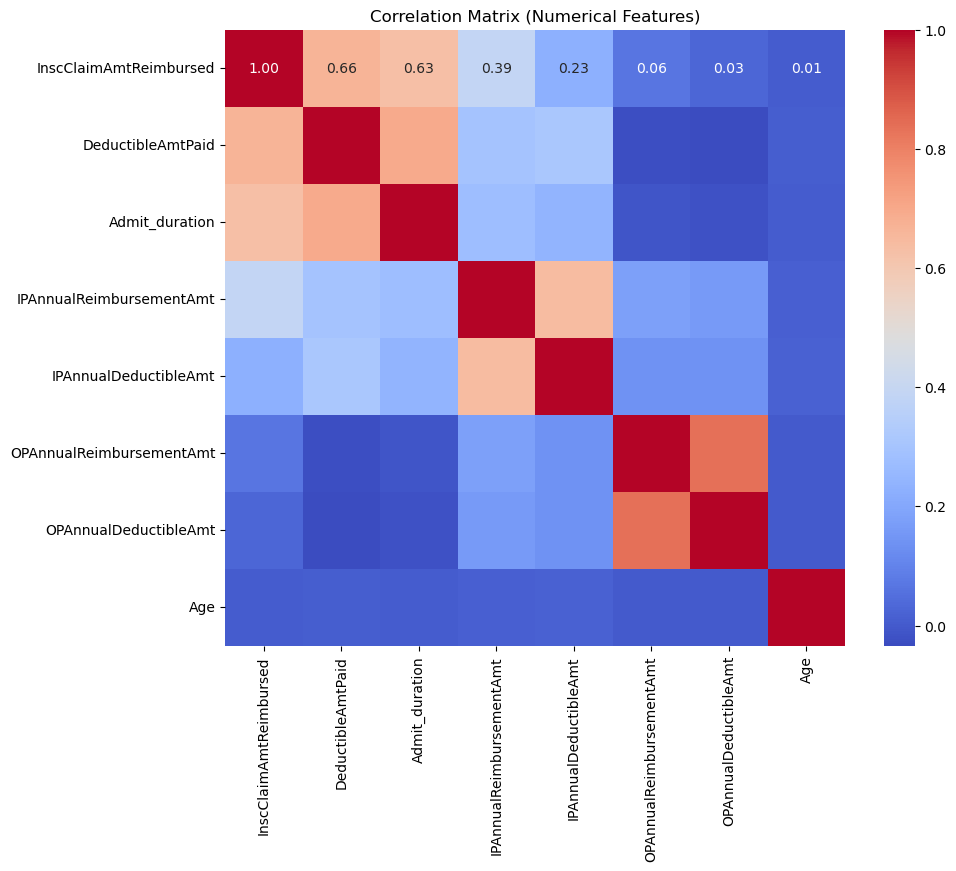

In [158]:
numerical_columns = Final_all_patient.select_dtypes(include=['int64', 'float64', 'int32']).columns
correlation_matrix = Final_all_patient[numerical_columns].corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Visualizing the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


# Feature importance using Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
# Frequency encode categorical features, so that they can used to fit in the model
categorical_columns = Final_all_patient.select_dtypes(include=['category']).columns
for col in categorical_columns:
    Final_all_patient[col] = Final_all_patient[col].map(Final_all_patient[col].value_counts())


In [169]:
# Defining feature set (X) and target (y)
X = Final_all_patient.drop(columns=['PotentialFraud'])  # Drop target variable from features
y = Final_all_patient['PotentialFraud'].cat.codes  # Convert target to numeric

In [170]:
# Training Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [171]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

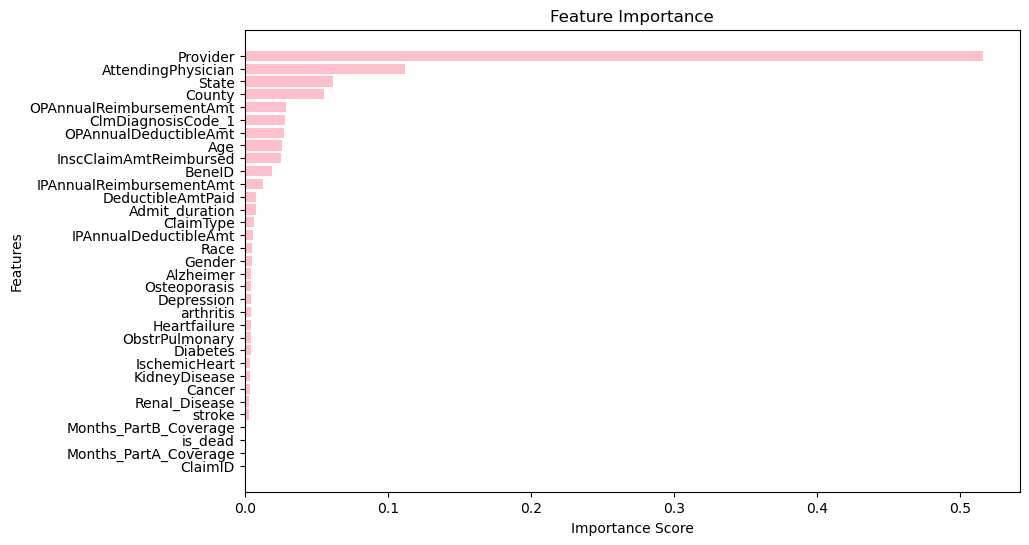

In [172]:
# Sorting features by importance
feature_importances_sorted = feature_importances.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_sorted['Feature'], feature_importances_sorted['Importance'], color='pink')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert axis to display the most important features at the top
plt.show()


In [173]:
Final_all_patient.dtypes

BeneID                         int64
ClaimID                        int64
Provider                       int64
InscClaimAmtReimbursed         int64
AttendingPhysician             int64
DeductibleAmtPaid            float64
ClmDiagnosisCode_1             int64
Admit_duration               float64
ClaimType                   category
Gender                      category
Race                        category
Renal_Disease               category
State                       category
County                         int64
Months_PartA_Coverage          int64
Months_PartB_Coverage       category
Alzheimer                   category
Heartfailure                category
KidneyDisease               category
Cancer                      category
ObstrPulmonary              category
Depression                  category
Diabetes                    category
IschemicHeart               category
Osteoporasis                category
arthritis                   category
stroke                      category
I

In [174]:
Final_all_patient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Admit_duration,ClaimType,Gender,...,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,is_dead,PotentialFraud
0,3,1,104,26000,1,1068.0,66,6.0,40362,230057,...,372553,170066,55646,36000,3204,60,70,67,542243,208410
1,3,1,239,5000,2,1068.0,21,2.0,40362,230057,...,372553,170066,55646,36000,3204,60,70,67,542243,337877
2,3,1,20,5000,5,1068.0,127,3.0,40362,230057,...,372553,170066,55646,36000,3204,60,70,67,542243,337877
3,4,1,88,5000,35,1068.0,696,8.0,40362,316230,...,372553,170066,55646,5000,1068,250,320,95,542243,337877
4,2,1,26,10000,2,1068.0,90,17.0,40362,316230,...,372553,376221,490641,21260,2136,120,100,71,542243,337877


## Dropping columns with low importance

In [319]:
columns_to_drop = ['Months_PartB_Coverage', 'is_dead', 'Months_PartA_Coverage', 'ClaimID']

Final_all_patient = Final_all_patient.drop(columns=columns_to_drop)

print("Columns after dropping low-importance features:")
print(Final_all_patient.columns)


Columns after dropping low-importance features:
Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'Admit_duration',
       'ClaimType', 'Gender', 'Race', 'Renal_Disease', 'State', 'County',
       'Alzheimer', 'Heartfailure', 'KidneyDisease', 'Cancer',
       'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'arthritis', 'stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'PotentialFraud'],
      dtype='object')


In [320]:
#converting diseases and Fraud columns to numeric

In [321]:
numeric_conversion_columns = ['Renal_Disease', 'Alzheimer', 'Heartfailure', 
                               'KidneyDisease', 'Cancer', 'ObstrPulmonary', 
                               'Depression', 'Diabetes', 'IschemicHeart', 
                               'Osteoporasis', 'arthritis', 'stroke', 'PotentialFraud']

In [322]:
for col in numeric_conversion_columns:
    Final_all_patient[col] = Final_all_patient[col].astype(int)

In [323]:
Final_all_patient.head()

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,Admit_duration,ClaimType,Gender,Race,...,IschemicHeart,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,PRV55912,26000,PHY390922,1068.0,1970,6.0,Inpatient,1,1,...,1,0,1,1,36000,3204,60,70,67,1
1,BENE11001,PRV55907,5000,PHY318495,1068.0,6186,2.0,Inpatient,1,1,...,1,0,1,1,36000,3204,60,70,67,0
2,BENE11001,PRV56046,5000,PHY372395,1068.0,29623,3.0,Inpatient,1,1,...,1,0,1,1,36000,3204,60,70,67,0
3,BENE11011,PRV52405,5000,PHY369659,1068.0,43491,8.0,Inpatient,0,2,...,0,0,1,1,5000,1068,250,320,95,0
4,BENE11014,PRV56614,10000,PHY379376,1068.0,042,17.0,Inpatient,0,1,...,1,0,0,0,21260,2136,120,100,71,0


In [324]:
Final_all_patient.shape

(546287, 30)

## Transforming the dataset on basis of provider. (As it seems more appropriate for our analysis)

#### We are performing a group by 'Provider' and aggregating other columns on basis of it. (Additionally, we removed gender and race and county)

In [325]:

provider_level = Final_all_patient.groupby('Provider').agg({
    'BeneID': 'count',  # Total beneficiaries associated with the provider
    'InscClaimAmtReimbursed': 'sum',  # Total amount reimbursed
    'AttendingPhysician': 'nunique',  # Number of unique attending physicians
    'DeductibleAmtPaid': 'mean',  # Average deductible paid
    'Admit_duration': 'mean',  # Average admit duration
    'Renal_Disease': 'sum',  # Count of cases for specific health conditions
    'Alzheimer': 'sum',
    'Heartfailure': 'sum',
    'KidneyDisease': 'sum',
    'Cancer': 'sum',
    'ObstrPulmonary': 'sum',
    'Depression': 'sum',
    'Diabetes': 'sum',
    'IschemicHeart': 'sum',
    'Osteoporasis': 'sum',
    'arthritis': 'sum',
    'stroke': 'sum',
    'IPAnnualReimbursementAmt': 'sum',  # Total inpatient reimbursement
    'IPAnnualDeductibleAmt': 'sum',  # Total inpatient deductible
    'OPAnnualReimbursementAmt': 'sum',  # Total outpatient reimbursement
    'OPAnnualDeductibleAmt': 'sum',  # Total outpatient deductible
    'Age': 'mean',  # Average age of beneficiaries
    'State': lambda x: x.mode().iloc[0] if not x.mode().empty else None,  # Most common state
    'PotentialFraud': 'mean' #The potential Fraud for the provider (Reason why we have taken mean is if provider is fraudulent, mean will give 1, if not 0)
}).reset_index()



# Rename columns for clarity
provider_level.rename(columns={'BeneID': 'TotalBeneficiaries', 
                               'AttendingPhysician': 'UniqueAttendingPhysicians'}, inplace=True)

# Display the transformed DataFrame
print(provider_level.head())


C:\Users\Anand\AppData\Local\Temp\ipykernel_11092\3220909830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  provider_level = Final_all_patient.groupby('Provider').agg({


   Provider  TotalBeneficiaries  InscClaimAmtReimbursed  \
0  PRV51001                  24                  104340   
1  PRV51003                 132                  605670   
2  PRV51004                 143                   51830   
3  PRV51005                1147                  276360   
4  PRV51007                  72                   33710   

   UniqueAttendingPhysicians  DeductibleAmtPaid  Admit_duration  \
0                         13         222.500000        1.041667   
1                         44         502.166667        2.424242   
2                         37           2.167832        0.000000   
3                          6           3.138622        0.000000   
4                         10          45.333333        0.222222   

   Renal_Disease  Alzheimer  Heartfailure  KidneyDisease  ...  Osteoporasis  \
0              7         14            18             16  ...             6   
1             29         56            80             64  ...            33   
2    

In [326]:
provider_level.shape

(5410, 25)

## Data cleaning on this new data

In [327]:
#checking if all providers are unique or not
unique_providers = provider_level['Provider'].is_unique
unique_providers

True

In [328]:
# Checking for for null values in each column
null_counts = provider_level.isnull().sum()
print(null_counts)


Provider                     0
TotalBeneficiaries           0
InscClaimAmtReimbursed       0
UniqueAttendingPhysicians    0
DeductibleAmtPaid            5
Admit_duration               5
Renal_Disease                0
Alzheimer                    0
Heartfailure                 0
KidneyDisease                0
Cancer                       0
ObstrPulmonary               0
Depression                   0
Diabetes                     0
IschemicHeart                0
Osteoporasis                 0
arthritis                    0
stroke                       0
IPAnnualReimbursementAmt     0
IPAnnualDeductibleAmt        0
OPAnnualReimbursementAmt     0
OPAnnualDeductibleAmt        0
Age                          5
State                        5
PotentialFraud               5
dtype: int64


In [329]:
# Dropping all rows with any null values
provider_level = provider_level.dropna()

In [330]:
#No null values remaining now.
null_counts = provider_level.isnull().sum()
print(null_counts)


Provider                     0
TotalBeneficiaries           0
InscClaimAmtReimbursed       0
UniqueAttendingPhysicians    0
DeductibleAmtPaid            0
Admit_duration               0
Renal_Disease                0
Alzheimer                    0
Heartfailure                 0
KidneyDisease                0
Cancer                       0
ObstrPulmonary               0
Depression                   0
Diabetes                     0
IschemicHeart                0
Osteoporasis                 0
arthritis                    0
stroke                       0
IPAnnualReimbursementAmt     0
IPAnnualDeductibleAmt        0
OPAnnualReimbursementAmt     0
OPAnnualDeductibleAmt        0
Age                          0
State                        0
PotentialFraud               0
dtype: int64


## Transforming US states into a more broader term called region, to reduce cardinality for modeling

### Grouping U.S. states into regions based on commonly used classifications by the U.S. Census Bureau:


In [331]:
state_to_region = {
    'Northeast': [7, 20, 22, 30, 31, 33, 39, 41, 47],
    'Midwest': [14, 15, 16, 17, 23, 24, 26, 28, 35, 36, 43, 51],
    'South': [1, 4, 8, 9, 10, 11, 18, 19, 21, 25, 34, 37, 42, 44, 45, 48, 50, 40, 53, 54],
    'West': [2, 3, 5, 6, 12, 13, 27, 29, 32, 38, 46, 49, 52]
}

state_to_region_flat = {state: region for region, states in state_to_region.items() for state in states}


provider_level['Region'] = provider_level['State'].map(state_to_region_flat)



# Display the updated DataFrame
print(provider_level.head())


   Provider  TotalBeneficiaries  InscClaimAmtReimbursed  \
0  PRV51001                  24                  104340   
1  PRV51003                 132                  605670   
2  PRV51004                 143                   51830   
3  PRV51005                1147                  276360   
4  PRV51007                  72                   33710   

   UniqueAttendingPhysicians  DeductibleAmtPaid  Admit_duration  \
0                         13         222.500000        1.041667   
1                         44         502.166667        2.424242   
2                         37           2.167832        0.000000   
3                          6           3.138622        0.000000   
4                         10          45.333333        0.222222   

   Renal_Disease  Alzheimer  Heartfailure  KidneyDisease  ...  arthritis  \
0              7         14            18             16  ...          8   
1             29         56            80             64  ...         38   
2             

In [332]:
#Dropping State and 'Provider'

In [333]:
provider_level = provider_level.drop(columns=['Provider', 'State'])
provider_level.head()

,TotalBeneficiaries,InscClaimAmtReimbursed,UniqueAttendingPhysicians,DeductibleAmtPaid,Admit_duration,Renal_Disease,Alzheimer,Heartfailure,KidneyDisease,Cancer,...,Osteoporasis,arthritis,stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,Region
0,24,104340,13,222.500000,1.041667,7,14,18,16,5,...,6,8,6,440150,22428,64750,11468,79.250000,0.0,South
1,132,605670,44,502.166667,2.424242,29,56,80,64,10,...,33,38,12,999000,122948,353520,97300,69.659091,1.0,South
2,143,51830,37,2.167832,0.000000,23,61,85,49,15,...,48,44,17,636530,62672,322840,91020,71.916084,0.0,South
3,1147,276360,6,3.138622,0.000000,256,420,669,500,164,...,338,330,121,4201950,437452,2405640,724613,70.157803,1.0,South
4,72,33710,10,45.333333,0.222222,11,26,40,22,12,...,21,22,12,219600,32040,124540,33820,68.819444,0.0,South


In [334]:
provider_level.dtypes

TotalBeneficiaries             int64
InscClaimAmtReimbursed         int64
UniqueAttendingPhysicians      int64
DeductibleAmtPaid            float64
Admit_duration               float64
Renal_Disease                  int32
Alzheimer                      int32
Heartfailure                   int32
KidneyDisease                  int32
Cancer                         int32
ObstrPulmonary                 int32
Depression                     int32
Diabetes                       int32
IschemicHeart                  int32
Osteoporasis                   int32
arthritis                      int32
stroke                         int32
IPAnnualReimbursementAmt       int64
IPAnnualDeductibleAmt          int64
OPAnnualReimbursementAmt       int64
OPAnnualDeductibleAmt          int64
Age                          float64
PotentialFraud               float64
Region                        object
dtype: object

#### changing data types before modeling

In [335]:
provider_level['DeductibleAmtPaid'] = provider_level['DeductibleAmtPaid'].round(0).astype(int)
provider_level['Admit_duration'] = provider_level['Admit_duration'].round(0).astype(int)

In [336]:
provider_level['Region'] = provider_level['Region'].astype('category')

In [337]:
Final_all_patient['PotentialFraud'] = Final_all_patient['PotentialFraud'].astype(int)

## Encoding of categorical variables before modeling

In [338]:
provider_level = pd.get_dummies(provider_level, columns=['Region'], drop_first=True)


In [339]:
Final_all_patient['PotentialFraud'].head()

0    1
1    0
2    0
3    0
4    0
Name: PotentialFraud, dtype: int32

In [340]:
# Verify the data types
print(provider_level.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5405 entries, 0 to 5409
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TotalBeneficiaries         5405 non-null   int64  
 1   InscClaimAmtReimbursed     5405 non-null   int64  
 2   UniqueAttendingPhysicians  5405 non-null   int64  
 3   DeductibleAmtPaid          5405 non-null   int32  
 4   Admit_duration             5405 non-null   int32  
 5   Renal_Disease              5405 non-null   int32  
 6   Alzheimer                  5405 non-null   int32  
 7   Heartfailure               5405 non-null   int32  
 8   KidneyDisease              5405 non-null   int32  
 9   Cancer                     5405 non-null   int32  
 10  ObstrPulmonary             5405 non-null   int32  
 11  Depression                 5405 non-null   int32  
 12  Diabetes                   5405 non-null   int32  
 13  IschemicHeart              5405 non-null   int32  
 1

# Checking class imbalance

Class Distribution (%):
PotentialFraud
0.0    90.638298
1.0     9.361702
Name: proportion, dtype: float64


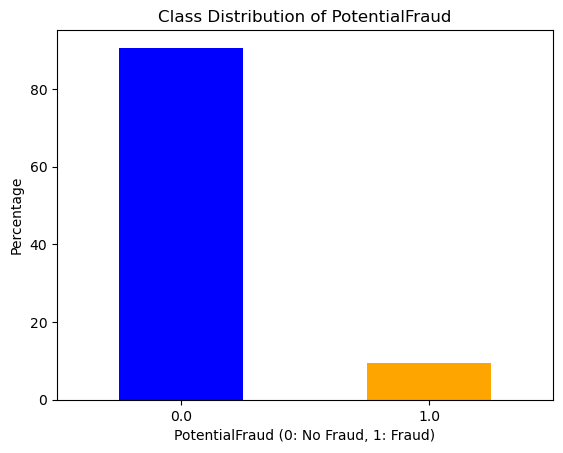

In [341]:
# Checking the distribution of the target variable
class_distribution = provider_level['PotentialFraud'].value_counts(normalize=True) * 100  # Percentage distribution
print("Class Distribution (%):")
print(class_distribution)

# Visualize the distribution
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution of PotentialFraud')
plt.xlabel('PotentialFraud (0: No Fraud, 1: Fraud)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


## Test Train Split 

In [342]:
X = provider_level.drop(columns=['PotentialFraud'])
y = provider_level['PotentialFraud']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fixing class imbalance using SMOTE

In [343]:
from imblearn.over_sampling import SMOTE

In [344]:
smote = SMOTE(random_state=56)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Machine Learning and Modeling

# Logistic regression

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [346]:
log_reg = LogisticRegression(max_iter=500, random_state=42)

log_reg.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=500, random_state=42)

In [347]:
# Making predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  


In [348]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[887  88]
 [ 20  86]]


In [349]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94       975
         1.0       0.49      0.81      0.61       106

    accuracy                           0.90      1081
   macro avg       0.74      0.86      0.78      1081
weighted avg       0.93      0.90      0.91      1081



# Random Forest

In [350]:
from sklearn.ensemble import RandomForestClassifier

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [352]:
smote = SMOTE(random_state=56)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [353]:
print("Class Distribution After SMOTE:")
print(y_train_smote.value_counts())

Class Distribution After SMOTE:
PotentialFraud
0.0    3924
1.0    3924
Name: count, dtype: int64


In [354]:
rf_model = RandomForestClassifier(random_state=56)

In [355]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=56)

In [356]:
y_pred = rf_model.predict(X_test)

In [357]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       975
         1.0       0.54      0.67      0.60       106

    accuracy                           0.91      1081
   macro avg       0.75      0.80      0.77      1081
weighted avg       0.92      0.91      0.92      1081



In [362]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.9140154813739719

## Hyperparameter Tuning

In [363]:
## RandomizedSearch Search

In [394]:
from sklearn.model_selection import RandomizedSearchCV


In [397]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 500, 600],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}




In [398]:
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  
    scoring='f1',
    cv=5,
    random_state=322,
    n_jobs=-1  # Using all available cores
)

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=322)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [400]:
random_search.fit(X_train_smote, y_train_smote)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 600]},
                   random_state=322, scoring='f1')

In [401]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}


In [402]:
best_model = random_search.best_estimator_

In [403]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       975
         1.0       0.54      0.72      0.62       106

    accuracy                           0.91      1081
   macro avg       0.76      0.83      0.78      1081
weighted avg       0.93      0.91      0.92      1081



In [374]:
feature_importances = best_model.feature_importances_

features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

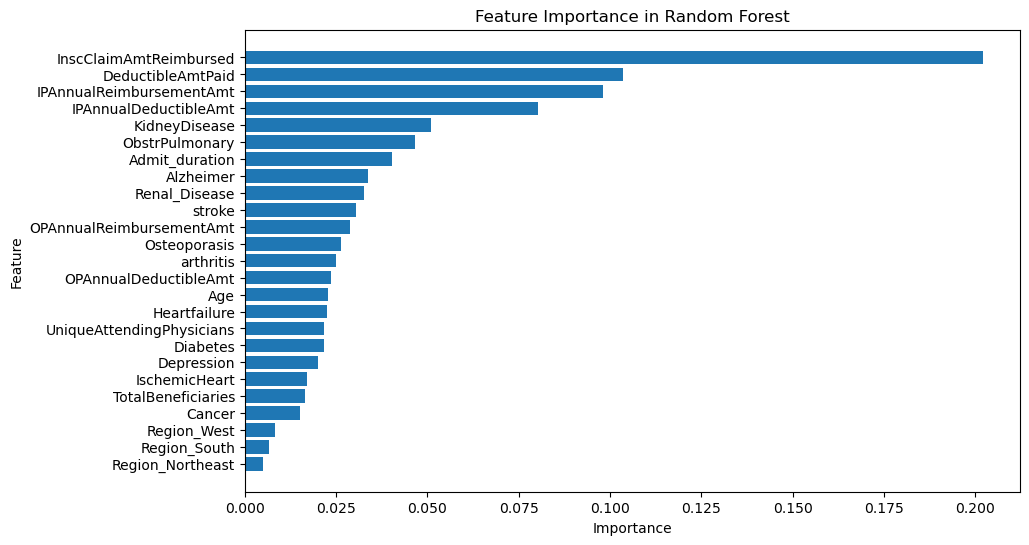

In [375]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  
plt.show()

# Using SHAP

In [376]:
import shap

In [377]:
explainer = shap.Explainer(best_model)

In [378]:
shap_values = explainer.shap_values(X_test)

In [379]:
shap_values.shape

(1081, 25, 2)

In [380]:
shap_values_class = shap_values[:, :, 1]  # Taking the last dimension for class 1 because it is fraud = true

In [381]:
shap_values_class

array([[-0.00465827, -0.12281323, -0.00765175, ...,  0.01181923,
        -0.00547737, -0.0090109 ],
       [-0.00492705, -0.1164796 , -0.00583808, ..., -0.00276362,
         0.00531072, -0.00860318],
       [ 0.00319047,  0.11800282, -0.00348464, ..., -0.00202636,
         0.01404422, -0.01497662],
       ...,
       [-0.00878512, -0.01391579, -0.00911301, ..., -0.00432151,
         0.00843889, -0.01565894],
       [-0.00084409, -0.13681183, -0.00605471, ..., -0.00276919,
        -0.00615432, -0.00941696],
       [-0.00256076, -0.24024086, -0.00490015, ..., -0.00299684,
         0.01035788, -0.01636063]])

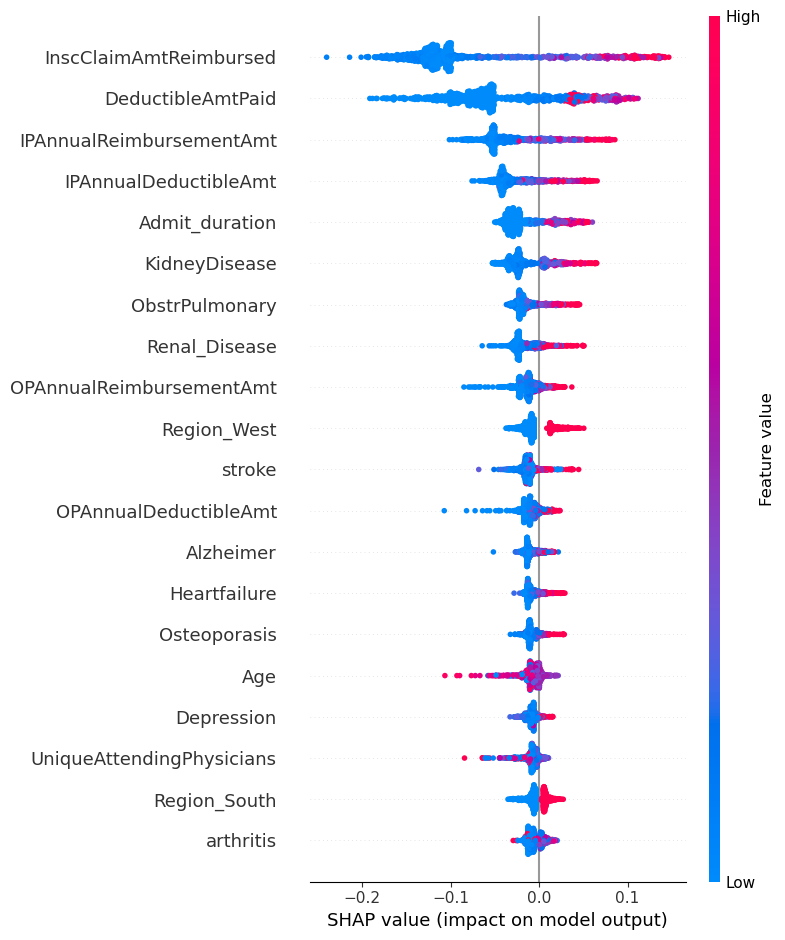

In [382]:
shap.summary_plot(shap_values_class, X_test)


## XG BOOST (With Hyper-Parameter Tuning)

In [404]:
from xgboost import XGBClassifier

In [405]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [406]:
#parameter grid for RandomizedSearchCV

param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1, 10, 50]  # For handling imbalance
}

In [407]:
random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_distributions,
    n_iter=50,  
    scoring='f1', 
    cv=5,  
    random_state=42,
    n_jobs=-1  # for using all available CPU cores
)

In [408]:
random_search.fit(X_train, y_train)

C:\Users\Anand\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:53:24] WARNING: D:\bld\xgboost-split_1733179535861\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'scale_pos_weight': [1, 10, 50],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1')

In [409]:
y_pred = best_model.predict(X_test)

In [410]:
print("Best Hyperparameters:", random_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       975
         1.0       0.54      0.72      0.62       106

    accuracy                           0.91      1081
   macro avg       0.76      0.83      0.78      1081
weighted avg       0.93      0.91      0.92      1081



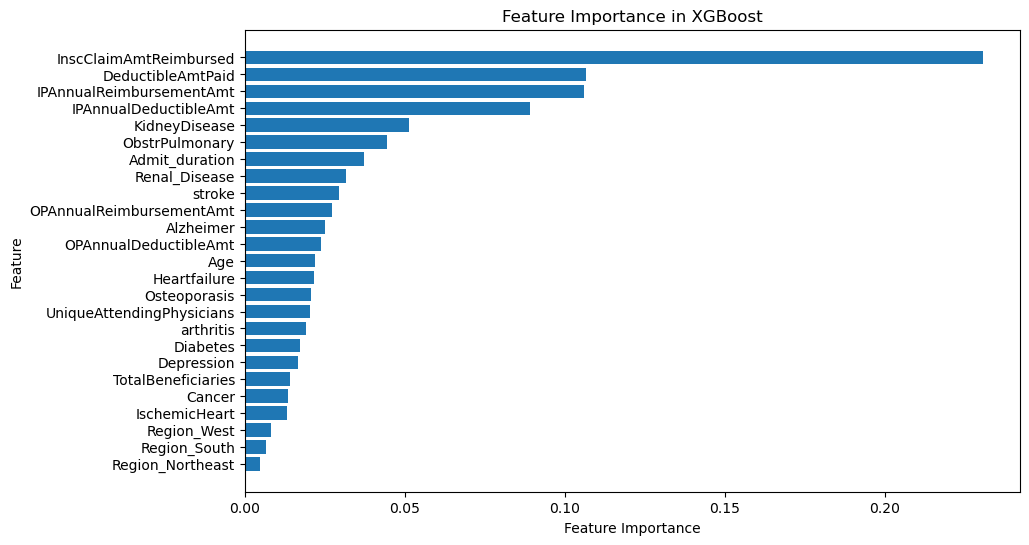

In [411]:
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()
plt.show()

### SHAP FOR XGBOOST

In [378]:
explainer = shap.TreeExplainer(best_model)


In [379]:
shap_values = explainer.shap_values(X_test)

In [380]:
shap_values_class = shap_values[:, :, 1]  # Take the last dimension for class 1

In [381]:
shap_values_class

array([[-0.00266984, -0.12693479, -0.00502853, ...,  0.02217604,
        -0.01565307, -0.01606102],
       [-0.00492893, -0.12519134, -0.00343405, ..., -0.00933308,
         0.01261618, -0.01397597],
       [ 0.00294423,  0.19242126,  0.00119081, ..., -0.00293159,
         0.04526917, -0.01442776],
       ...,
       [-0.01022797,  0.00402789, -0.0100059 , ..., -0.00448986,
         0.01258812, -0.03115703],
       [-0.00194683, -0.13247775, -0.00269537, ..., -0.00330834,
        -0.01122808, -0.00879547],
       [-0.00404409, -0.23913251, -0.00749145, ..., -0.00573198,
         0.01204609, -0.02022465]])

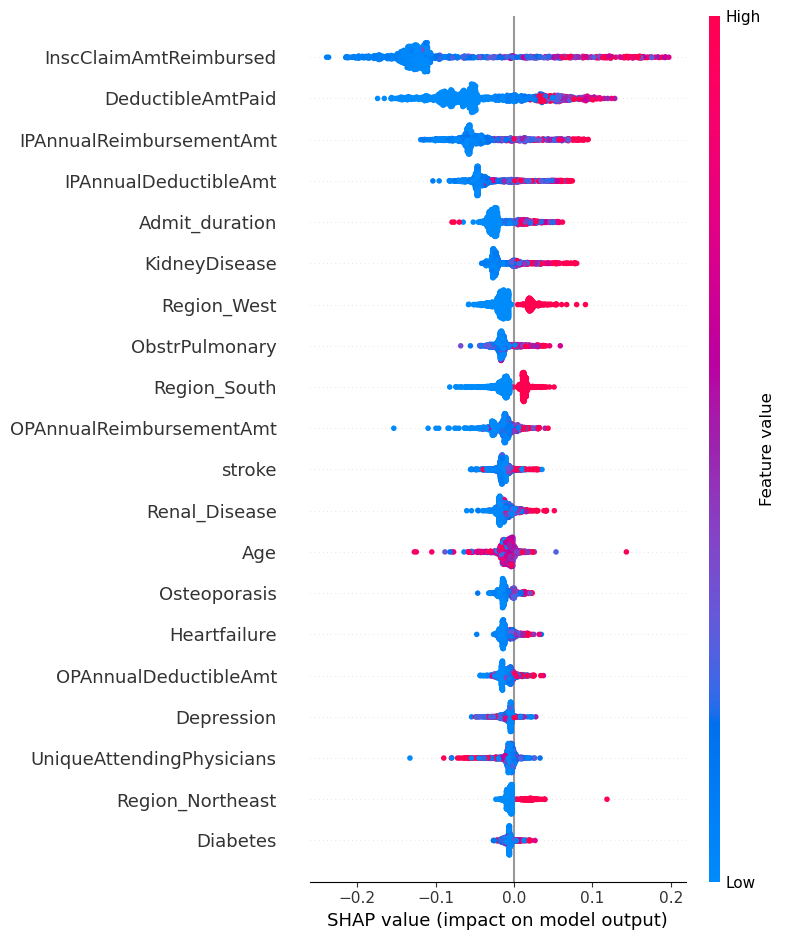

In [387]:
shap.summary_plot(shap_values_class, X_test)
